# BITS F312 - Neural Network and Fuzzy Logic



## Assignment 1

In [ ]:
# importing libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# connecting gdrive to access the datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# finding out current working directory
!pwd

/content


In [ ]:
# changing directory to - 'drive/MyDrive/NNFL/Data_A1/'
%cd drive/MyDrive/NNFL/Data_A1/

/content/drive/MyDrive/NNFL/Data_A1


In [ ]:
# defining plotting style
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14, 14)

# Q4
Implement logistic regression (LOR), LOR with L2-norm regularization, and LOR
with L1-norm regularization models using BGD, SGD, and MBGD algorithms. The
dataset in data_q4_q5.xlsx contains 30 features and one output. The class label ‘M’ stands for malignant, and ‘B’ is the Benign class. You must use hold-out
cross-validation ((CV) with 70% as training, 10% as validation and 20% as testing) to evaluate training, validation, and testing instances for each model. Evaluate the performance of each model using accuracy, sensitivity, and specificity measures.

In [ ]:
def sigmoid(z):
  z = z.astype('float')
  val = 1/(1 + np.exp(-z))
  return val

In [ ]:
def metrics(Y_true, Y_pred):
    FP=0 # For counting the False Positives
    FN=0 # For counting the False Negatives
    TN=0 # For counting the True Negatives
    TP=0 # For counting the True Positives

    for i in range(len(Y_true)):
      if Y_true[i]==1:
        if Y_pred[i]==1:
          TP+=1
        else:
          FN+=1
      else:
        if Y_pred[i]==0:
          TN+=1
        else:
          FP+=1

    print('--------------------------------------------------------------------------------')
  
    print("False Positives : ", FP)
    print("False Negatives : ", FN)
    print("True Negatives  : ", TN)
    print("True Positives  : ", TP)

    print('--------------------------------------------------------------------------------')

    sens= TP/(TP+FN)
    spes = TN/(TN+FP)

    print("Sensitivity : ", sens)
    print("Specificity : ", spes)
    print("Accuracy ((TN+TP)/(TN+TP+FN+FP)) : ", ((TP+TN)/(TN+FN+TP+FP)))
    print('--------------------------------------------------------------------------------')



In [ ]:
def predictLORL1(X,W, threshold = 0.5):
	Z = X.dot(W)
	y_prob = sigmoid(Z)
	y_prob = [1 if y>=threshold else 0 for y in y_prob]
	return y_prob


### Logistic Regression using L1-norm & L2-norm regularization approach & BGD

In [ ]:
def costFunctionLORL2(Y, Y_pred, W, lambd): 
  cost =  - Y*np.log(Y_pred)- (1-Y)*(np.log(1-Y_pred)) - (lambd/2)*(np.sum(W**2))
  return cost

In [ ]:
def costFunctionLORL1(Y, Y_pred, W, lambd): 
  cost =  - Y*np.log(Y_pred)- (1-Y)*(np.log(1-Y_pred)) - (lambd/2)*(np.sum(np.abs(W)))
  return cost

In [ ]:
def normalize(data):
  normalized_vec = data

  if(len(data.shape) == 1):
    mean = np.mean(data[:])
    std_dev = np.std(data[:])
    normalized_vec[:] = (normalized_vec[:] - mean)/std_dev
  else:
    for i in range(1,data.shape[1]):
      mean = np.mean(data[:, i])
      std_dev = np.std(data[:, i])
      normalized_vec[:,i] = (normalized_vec[:,i] - mean)/std_dev
  
  return normalized_vec

In [ ]:
def LOR_L2(filename, epoch = 200, alpha = 0.1, lambd = 0.0005):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('--------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('--------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL2(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    W = W - alpha*np.mean(((Y_prob - YVec).reshape(YVec.shape[0],1))*XVec, axis=0) - alpha*lambd*W

    print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train


In [ ]:
def LOR_L1(filename, epoch = 200, alpha = 0.1, lambd = 0.0005):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('--------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('--------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL1(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    W = W - alpha*np.mean(((Y_prob - YVec).reshape(YVec.shape[0],1))*XVec, axis=0) - alpha*lambd*np.sign(W) # using L1 norm

    print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_lor_L2(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function')
  plt.title('Cost Function v/s Epochs (Batch Gradient Descent)')

In [ ]:
# Plotting the Cost Function v/s Epochs
def plot_costs_lor_L1(costs):
  plt.plot(costs)
  plt.xlabel('Epochs')
  plt.ylabel('Cost Function')
  plt.title('Cost Function v/s Epochs (Batch Gradient Descent) - L1 Regularization')

## Output

In [ ]:
W_LOR_L2, costs_LOR_L2, Y_pred_LOR_L2 = LOR_L2(filename='data_q4_q5.xlsx')

--------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
--------------------------------------------
EPOCH : 0  &  LOSS : 4.7033198548232305
EPOCH : 1  &  LOSS : 4.014363860186594
EPOCH : 2  &  LOSS : 3.367451197344821
EPOCH : 3  &  LOSS : 2.778391322224374
EPOCH : 4  &  LOSS : 2.2636260335288516
EPOCH : 5  &  LOSS : 1.830889423129982
EPOCH : 6  &  LOSS : 1.486758182402907
EPOCH : 7  &  LOSS : 1.230268011432356
EPOCH : 8  &  LOSS : 1.0421863622559517
EPOCH : 9  &  LOSS : 0.8997695158800022
EPOCH : 10  &  LOSS : 0.789164746475629
EPOCH : 11  &  LOSS : 0.7022128894539544
EPOCH : 12  &  LOSS : 0.6331781213081241
EPOCH : 13  &  LOSS : 0.5774812146235702
EPOCH : 14  &  LOSS : 0.5317409518317702
EPOCH : 15  &  LOSS : 0.4936007987388552
EPOCH : 16  &  LOSS : 0.4613853406581965
EPOCH : 17  &  LOSS : 0.43386228065572957
EPOCH : 18  &  LOSS : 0.41010421388646684
EPOCH : 19  &  LOSS : 0.38940327048285106
EPOCH : 20  &  LOSS : 0.371213

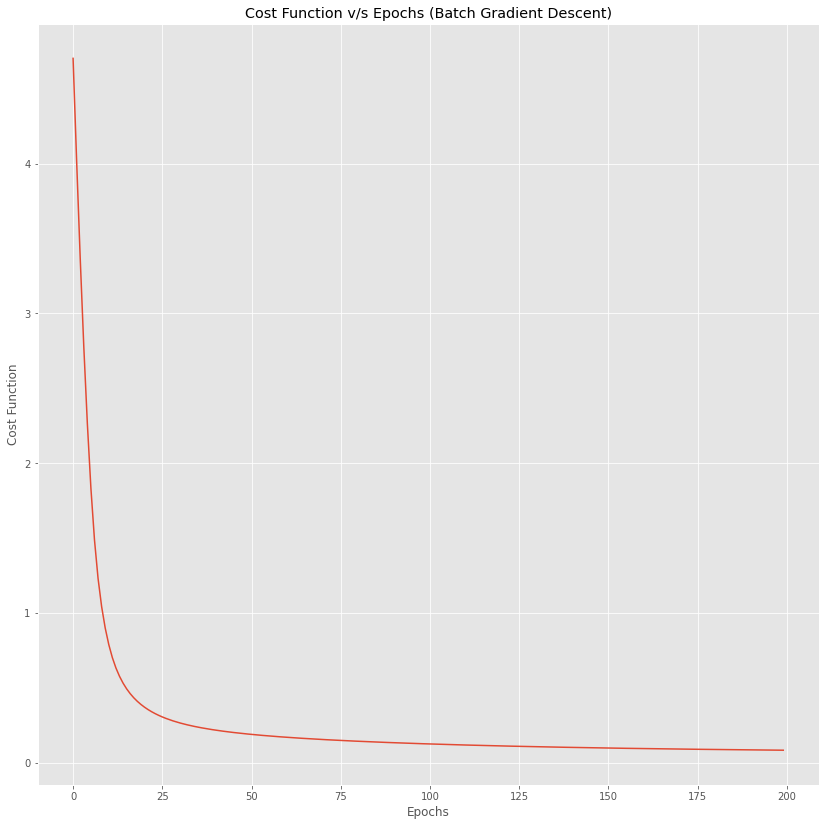

In [ ]:
plot_costs_lor_L2(costs=costs_LOR_L2)

In [ ]:
W_LOR_L1, costs_LOR_L1, Y_pred_LOR_L1 = LOR_L1(filename='data_q4_q5.xlsx')

--------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
--------------------------------------------
EPOCH : 0  &  LOSS : 2.813536372570219
EPOCH : 1  &  LOSS : 2.3234288373604772
EPOCH : 2  &  LOSS : 1.9078163761089362
EPOCH : 3  &  LOSS : 1.5697255634700207
EPOCH : 4  &  LOSS : 1.3068917591408673
EPOCH : 5  &  LOSS : 1.1077252032843168
EPOCH : 6  &  LOSS : 0.954572500669002
EPOCH : 7  &  LOSS : 0.835327566748748
EPOCH : 8  &  LOSS : 0.7409287800678803
EPOCH : 9  &  LOSS : 0.6646229519453029
EPOCH : 10  &  LOSS : 0.6018790557872471
EPOCH : 11  &  LOSS : 0.5495965275561934
EPOCH : 12  &  LOSS : 0.5055510768614476
EPOCH : 13  &  LOSS : 0.46808194606337394
EPOCH : 14  &  LOSS : 0.43591425961034574
EPOCH : 15  &  LOSS : 0.40803457982369
EPOCH : 16  &  LOSS : 0.3836754519182069
EPOCH : 17  &  LOSS : 0.36221195621968344
EPOCH : 18  &  LOSS : 0.34315840496343497
EPOCH : 19  &  LOSS : 0.3261281355238425
EPOCH : 20  &  LOSS : 0.310

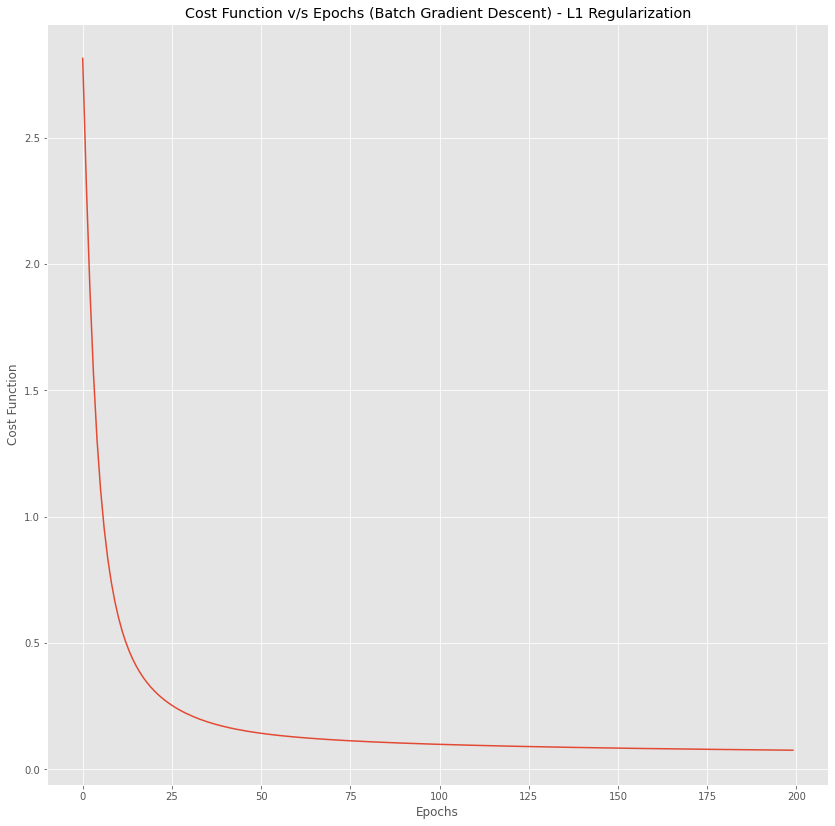

In [ ]:
plot_costs_lor_L1(costs=costs_LOR_L1)

### Logistic Regression using L1-norm & L2-norm regularization approach & SGD

In [ ]:
def LOR_L2_SGD(filename, epoch = 500, alpha = 0.39, lambd = 0.001):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('------------------------------------------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('------------------------------------------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL2(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    idx = np.random.randint(0,XVec.shape[0])
    W = W - alpha*np.mean(((Y_prob[idx] - YVec[idx]))*XVec[idx], axis=0) - alpha*lambd*W
    #print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train


In [ ]:
def LOR_L1_SGD(filename, epoch = 200, alpha = 0.3, lambd = 0.005):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('----------------------------------------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('----------------------------------------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL1(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    idx = np.random.randint(0,XVec.shape[0])
    W = W - alpha*np.mean(((Y_prob[idx] - YVec[idx]))*XVec[idx], axis=0) - alpha*lambd*np.sign(W)

    # print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train

### Output

In [ ]:
W_LOR_L2, costs_LOR_L2, Y_pred_LOR_L2_SGD = LOR_L2_SGD(filename='data_q4_q5.xlsx')

------------------------------------------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
------------------------------------------------------------------------------
--------------------------------------------
Metrics measured for training data
--------------------------------------------
False Positives :  19
False Negatives :  5
True Negatives  :  229
True Positives  :  145
--------------------------------------------
Sensitivity :  0.9666666666666667
Specificity :  0.9233870967741935
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9396984924623115
--------------------------------------------
Metrics measured for testing data
--------------------------------------------
False Positives :  9
False Negatives :  2
True Negatives  :  65
True Positives  :  39
--------------------------------------------
Sensitivity :  0.9512195121951219
Specificity :  0.8783783783783784
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9043478260869565
--------

In [ ]:
W_LOR_L1_SGD, costs_LOR_L1_SGD, Y_pred_LOR_L1_SGD = LOR_L1_SGD(filename='data_q4_q5.xlsx')

----------------------------------------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
----------------------------------------------------------------------------
--------------------------------------------
Metrics measured for training data
--------------------------------------------
False Positives :  6
False Negatives :  6
True Negatives  :  252
True Positives  :  134
--------------------------------------------
Sensitivity :  0.9571428571428572
Specificity :  0.9767441860465116
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9698492462311558
--------------------------------------------
Metrics measured for testing data
--------------------------------------------
False Positives :  1
False Negatives :  8
True Negatives  :  65
True Positives  :  41
--------------------------------------------
Sensitivity :  0.8367346938775511
Specificity :  0.9848484848484849
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9217391304347826
-------------

### Logistic Regression using L1-norm & L2-norm regularization approach & MBGD

In [ ]:
def LOR_L2_MBGD(filename, epoch = 500, alpha = 0.1, lambd = 0.01, batch_size = 16):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('------------------------------------------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('------------------------------------------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL2(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    idx = np.random.randint(0,XVec.shape[0], size=batch_size)
    W = W - alpha*np.mean(((Y_prob[idx] - YVec[idx])).dot(XVec[idx]), axis=0) - alpha*lambd*W
    #print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train


In [ ]:
def LOR_L1_MBGD(filename, epoch = 200, alpha = 0.1, lambd = 0.005, batch_size = 8):
  # reading the data
  data = pd.read_excel(filename)

  # shuffling the enteries for better spliting
  df = data.sample(frac=1).reset_index(drop=True)

  # encoding the data
  for i in range(len(df)):
    if(df['diagnosis'][i] == 'B'):
      df['diagnosis'][i] = 0
    elif(df['diagnosis'][i] == 'M'):
      df['diagnosis'][i] = 1


  # spliting the data (70-20-10 : validing, testing, validation)
  train_val = int(0.7*len(df))
  test_val = int(0.2*len(df))
  valid_val = int(0.1*len(df))
  
  print('----------------------------------------------------------------------------')
  print("Length of Training sets: {0}, Testing sets: {1}, and Valdiation sets: {2} ".format(train_val, test_val, valid_val))
  print('----------------------------------------------------------------------------')


  df_training = df[:train_val]
  df_validation = df[train_val:train_val+valid_val]
  df_testing = df[train_val+valid_val:]

  df_training.insert(0, 'ones', 1)
  df_validation.insert(0, 'ones', 1)
  df_testing.insert(0, 'ones', 1)

  # converting to numpy array
  df_train = df_training.to_numpy()
  df_valid = df_validation.to_numpy()
  df_test = df_testing.to_numpy()

  # obtaining the data 
  X_train = df_train[:,:(df_train.shape)[1] - 1]
  Y_train = df_train[:,df_train.shape[1]-1]

  X_valid = df_valid[:,:(df_valid.shape)[1] - 1]
  Y_valid = df_valid[:,df_valid.shape[1]-1]

  X_test = df_test[:,:(df_test.shape)[1] - 1]
  Y_test = df_test[:,df_test.shape[1]-1]



  # normalizing data
  XVec = normalize(X_train)
  YVec = Y_train

  # initalizing weights
  W = (np.random.randn((XVec.shape)[1])).T

  costs = [] # for recording the cost function

  for i in range(epoch):
    Z = XVec.dot(W)
    Y_prob = sigmoid(Z)

    cost = costFunctionLORL1(YVec, Y_prob, W, lambd)
    loss = np.mean(cost)
    costs.append(loss)

    idx = np.random.randint(0,XVec.shape[0], size=batch_size)
    W = W - alpha*np.mean(((Y_prob[idx] - YVec[idx])).dot(XVec[idx]), axis=0) - alpha*lambd*np.sign(W)

    # print('EPOCH : {}  &  LOSS : {}'.format(i, loss))

  print('--------------------------------------------')

  Y_pred_train = predictLORL1(XVec, W)
  Y_pred_test = predictLORL1(normalize(X_test), W)
  Y_pred_valid = predictLORL1(normalize(X_valid), W)
  
  print("Metrics measured for training data")
  metrics(Y_train, Y_pred_train)
  print("Metrics measured for testing data")
  metrics(Y_test, Y_pred_test)
  print("Metrics measured for validation data")
  metrics(Y_valid, Y_valid)

  
  return W, costs, Y_pred_train

## Output




In [ ]:
W_LOR_L2_MBGD, costs_LOR_L2_MBGD, Y_pred_LOR_L2_MBGD = LOR_L2_MBGD(filename='data_q4_q5.xlsx')

------------------------------------------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
------------------------------------------------------------------------------
--------------------------------------------
Metrics measured for training data
--------------------------------------------
False Positives :  16
False Negatives :  7
True Negatives  :  234
True Positives  :  141
--------------------------------------------
Sensitivity :  0.9527027027027027
Specificity :  0.936
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9422110552763819
--------------------------------------------
Metrics measured for testing data
--------------------------------------------
False Positives :  9
False Negatives :  0
True Negatives  :  67
True Positives  :  39
--------------------------------------------
Sensitivity :  1.0
Specificity :  0.881578947368421
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9217391304347826
-------------------------------------

In [ ]:
W_LOR_L1_MBGD, costs_LOR_L1_MBGD, Y_pred_LOR_L1_MBGD = LOR_L1_MBGD(filename='data_q4_q5.xlsx')

----------------------------------------------------------------------------
Length of Training sets: 398, Testing sets: 113, and Valdiation sets: 56 
----------------------------------------------------------------------------
--------------------------------------------
Metrics measured for training data
--------------------------------------------
False Positives :  11
False Negatives :  13
True Negatives  :  237
True Positives  :  137
--------------------------------------------
Sensitivity :  0.9133333333333333
Specificity :  0.9556451612903226
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9396984924623115
--------------------------------------------
Metrics measured for testing data
--------------------------------------------
False Positives :  7
False Negatives :  1
True Negatives  :  66
True Positives  :  41
--------------------------------------------
Sensitivity :  0.9761904761904762
Specificity :  0.9041095890410958
Accuracy ((TN+TP)/(TN+TP+FN+FP)) :  0.9304347826086956
-----------